# Car Price Analysis

## Introduction

Greetings to the Car Price Analysis project! This project's goal is to conduct a comprehensive Feature Importance Analysis. The dataset has information and various attributes of cars, such as brand, manufacturing year, selling price, mileage, fuel type, seller type, transmission, and owner history.

I use Exploratory Data Analysis to dive into the data and get a better understanding of the factors that impact the selling prices of used cars. This project like all the others in my portfolio, serves the purpose of demonstrating and testing all the skills I'm learning on my data journey. Please feel free to share any feedback as it will be greatly appreciated.

Let's embark on this analytical journey and uncover the nuances of the used car market!


## Data Exploration

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Loading the data
df = pd.read_csv('car_prediction_data.csv')

In [3]:
#Getting a quick overview of the columns and the first few rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Checking the data types and if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Right of the bat there are a 2 things I want to change.

1. Im not sure which currency the selling_price and present_price are in, so im going to multiply them by 1000 and pretend they are in USD
2. Year column data type has to be changed to date


In [5]:
#Multiplying by 1000

df['Selling_Price'] *= 1000
df['Present_Price'] *=1000

In [6]:
#Checking to see if it worked
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3350.0,5590.0,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4750.0,9540.0,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7250.0,9850.0,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2850.0,4150.0,5200,Petrol,Dealer,Manual,0
4,swift,2014,4600.0,6870.0,42450,Diesel,Dealer,Manual,0


In [7]:
#Checking to see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3350.0,5590.0,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4750.0,9540.0,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7250.0,9850.0,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2850.0,4150.0,5200,Petrol,Dealer,Manual,0
4,swift,2014,4600.0,6870.0,42450,Diesel,Dealer,Manual,0


After a couple of frustrating minitutes of trouble shooting and goolging i decided to change the Year to period data type because when i changed it to date it came with months and days included.
Period is essentially the same as date data type so im fine with that.


## Checking for outliers and Distribution of the key features to make my hypothesis




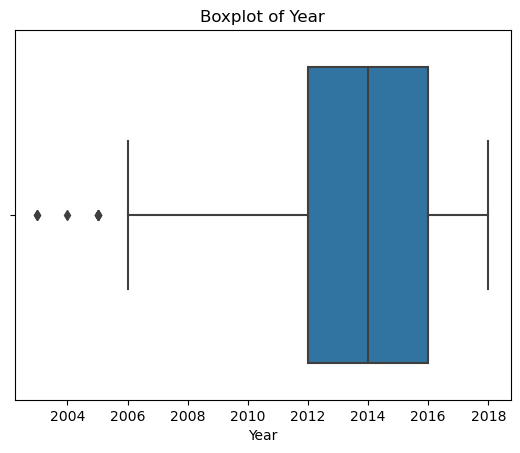

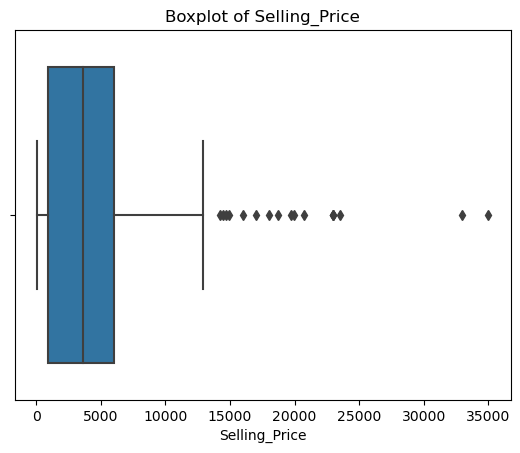

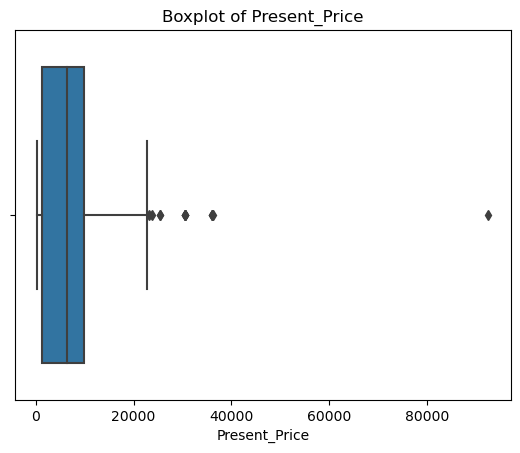

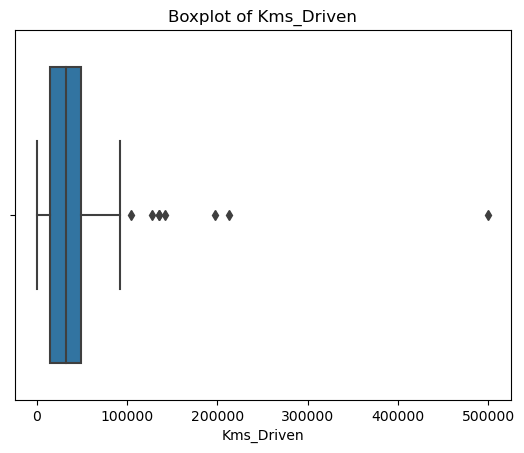

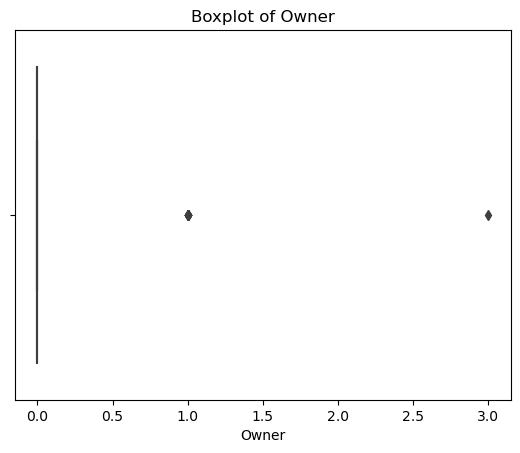

In [9]:
#Creating boxplot diagrams for all my numerical columns
for column in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure()
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')

Im not getting a clear picture from the scatter plot so im going to use other diagrams

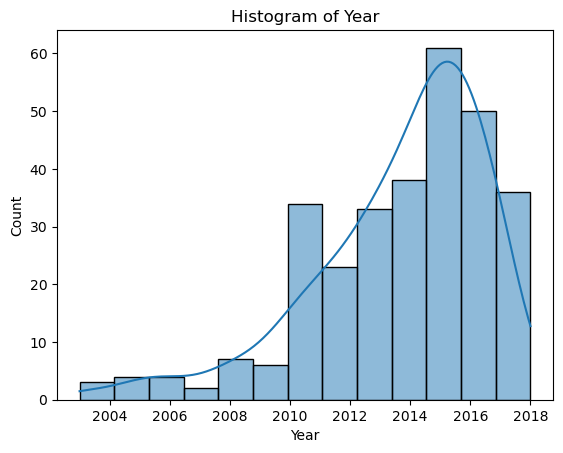

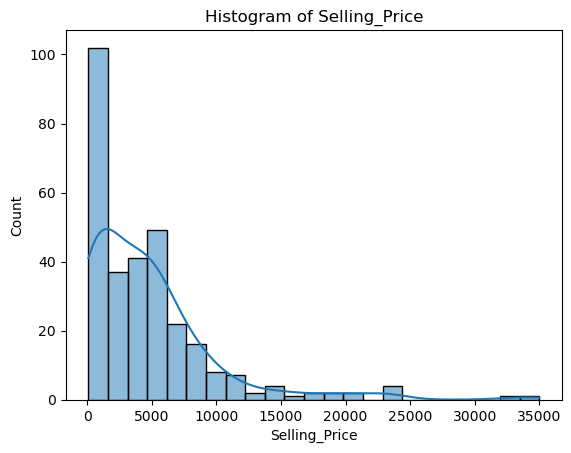

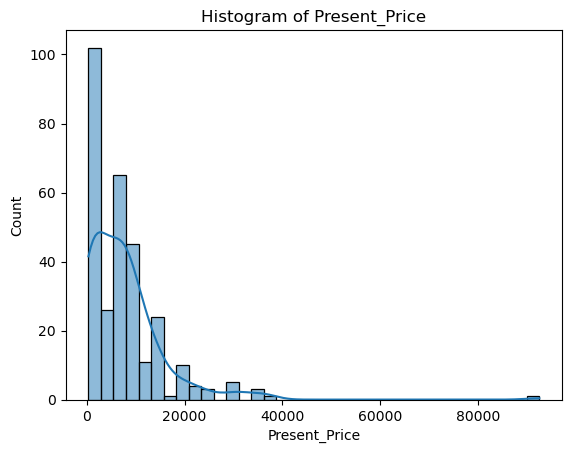

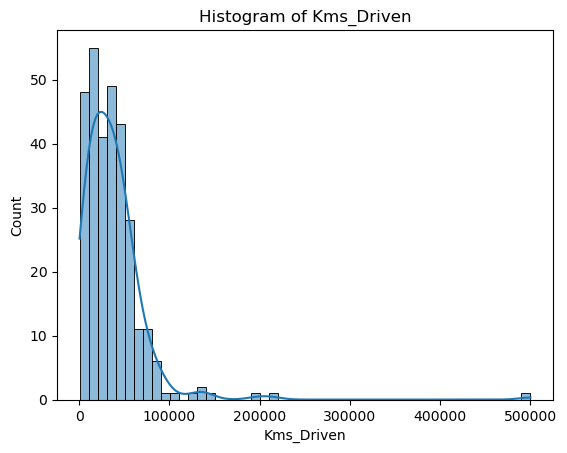

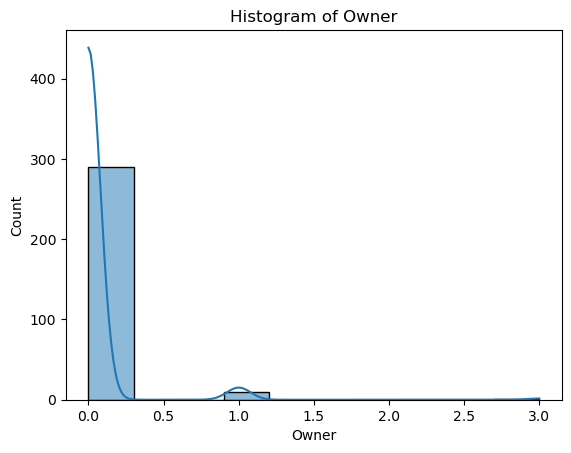

In [10]:
#Creating histogram  for all numerical columns
for column in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure()
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')

<Figure size 640x480 with 0 Axes>

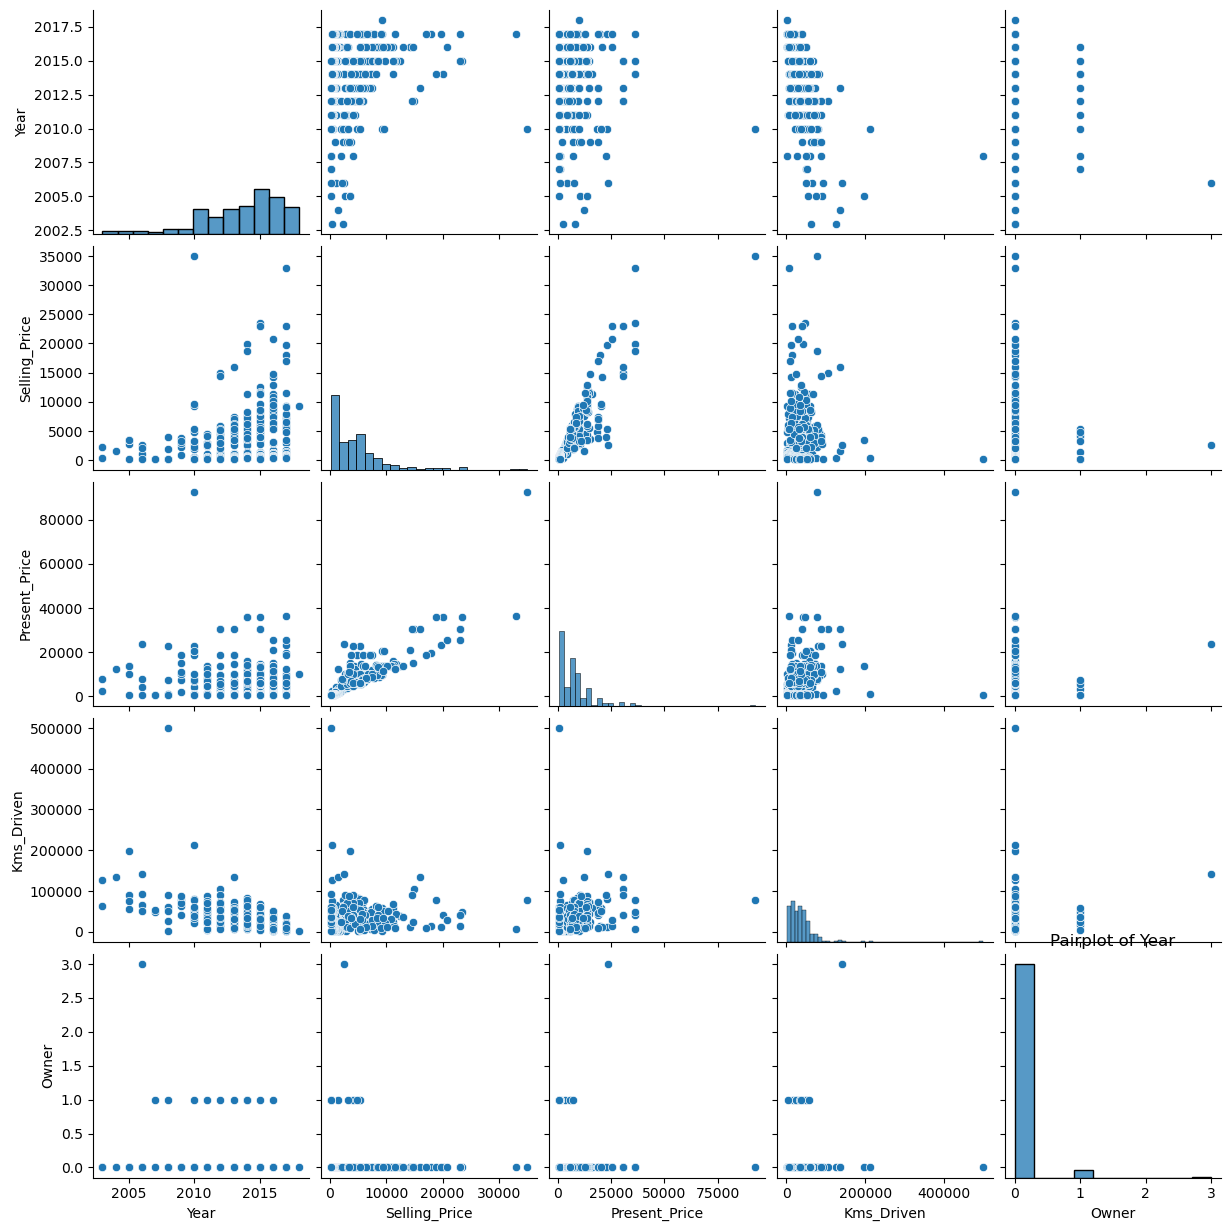

<Figure size 640x480 with 0 Axes>

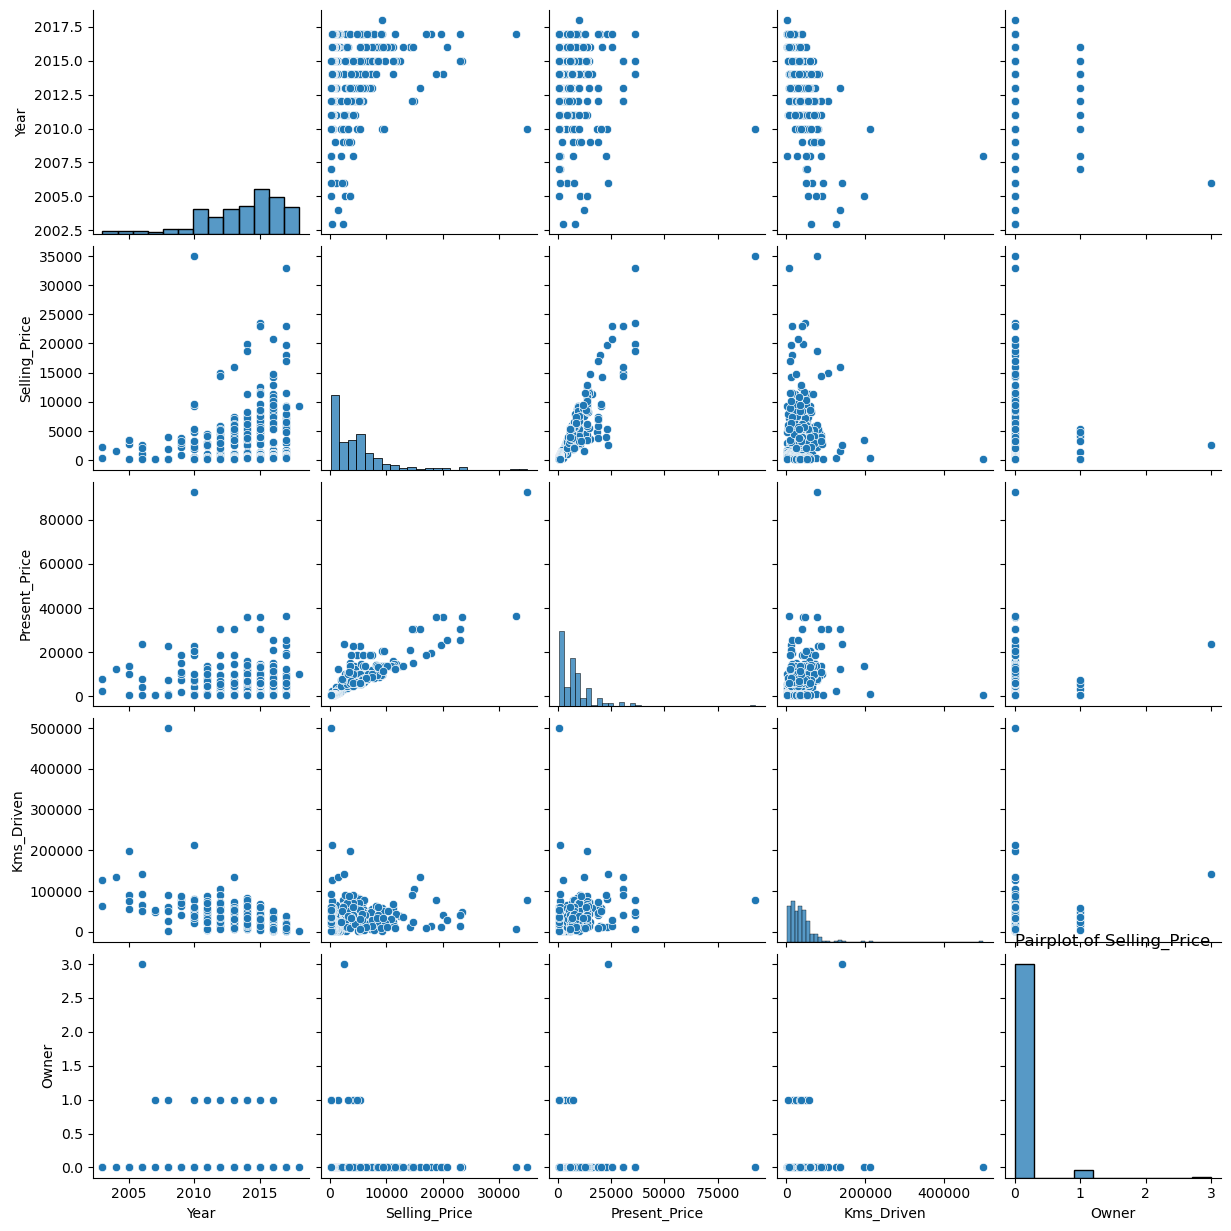

<Figure size 640x480 with 0 Axes>

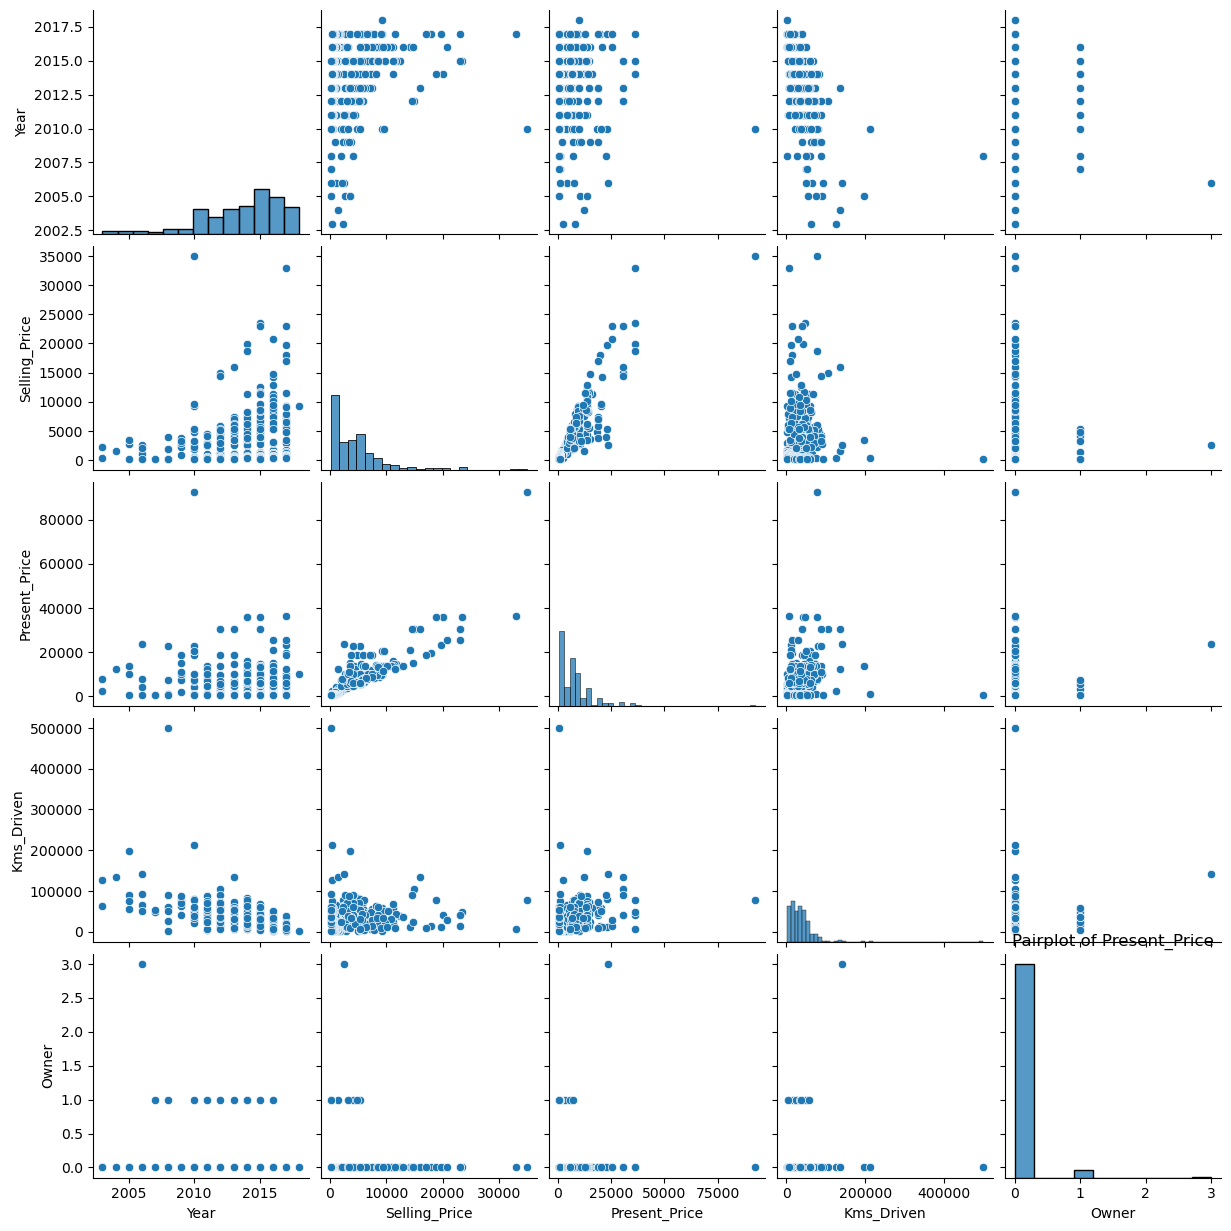

<Figure size 640x480 with 0 Axes>

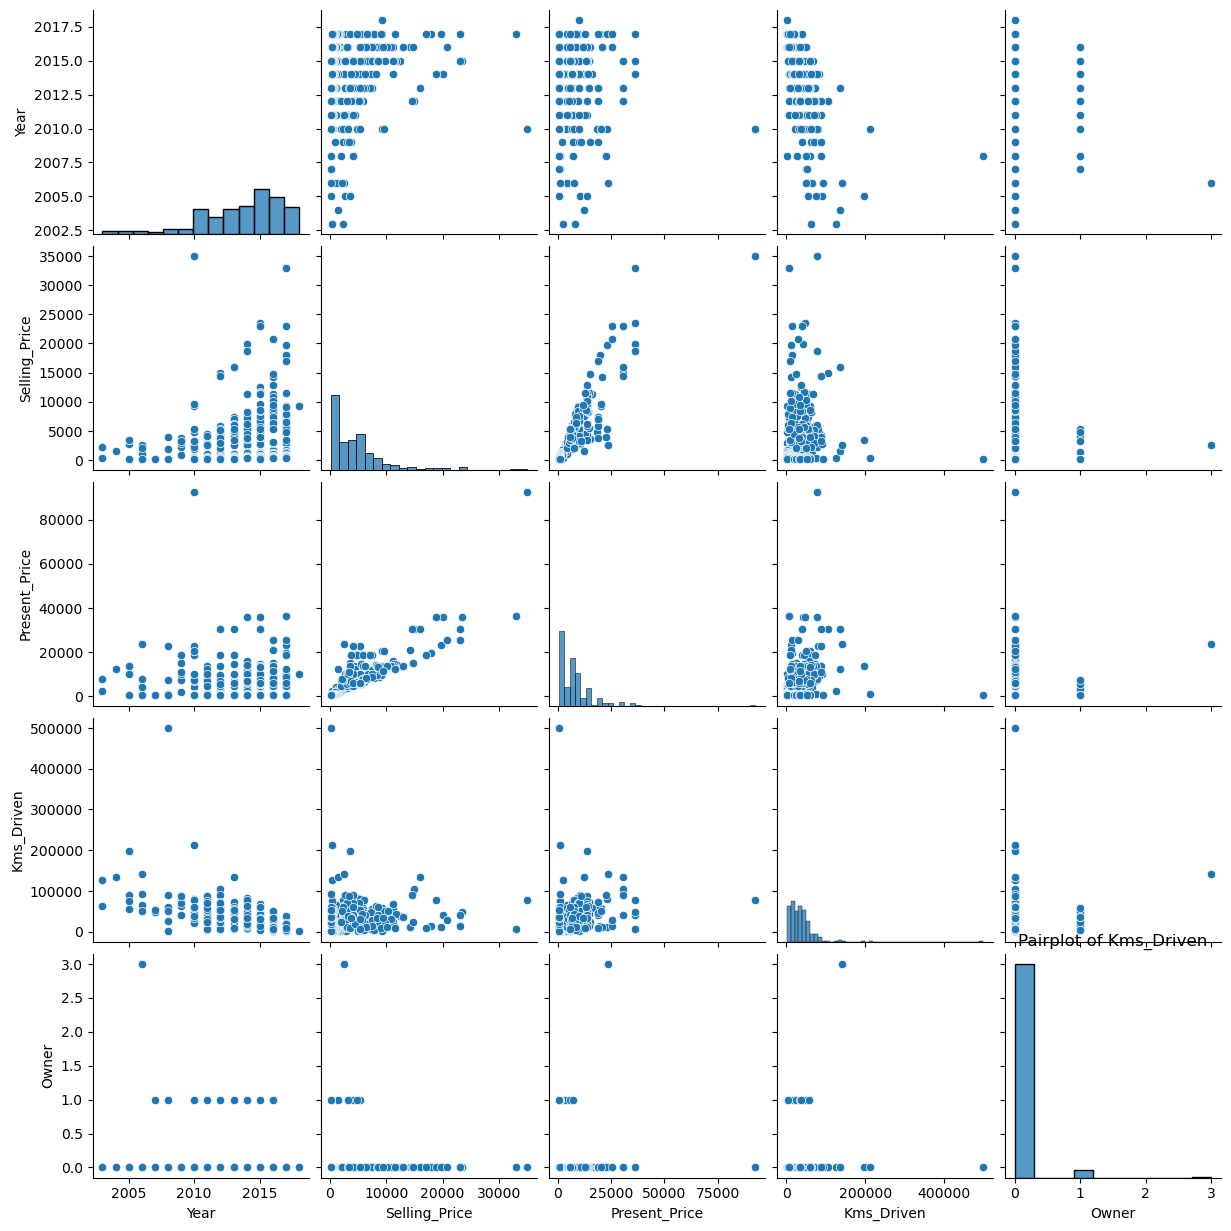

<Figure size 640x480 with 0 Axes>

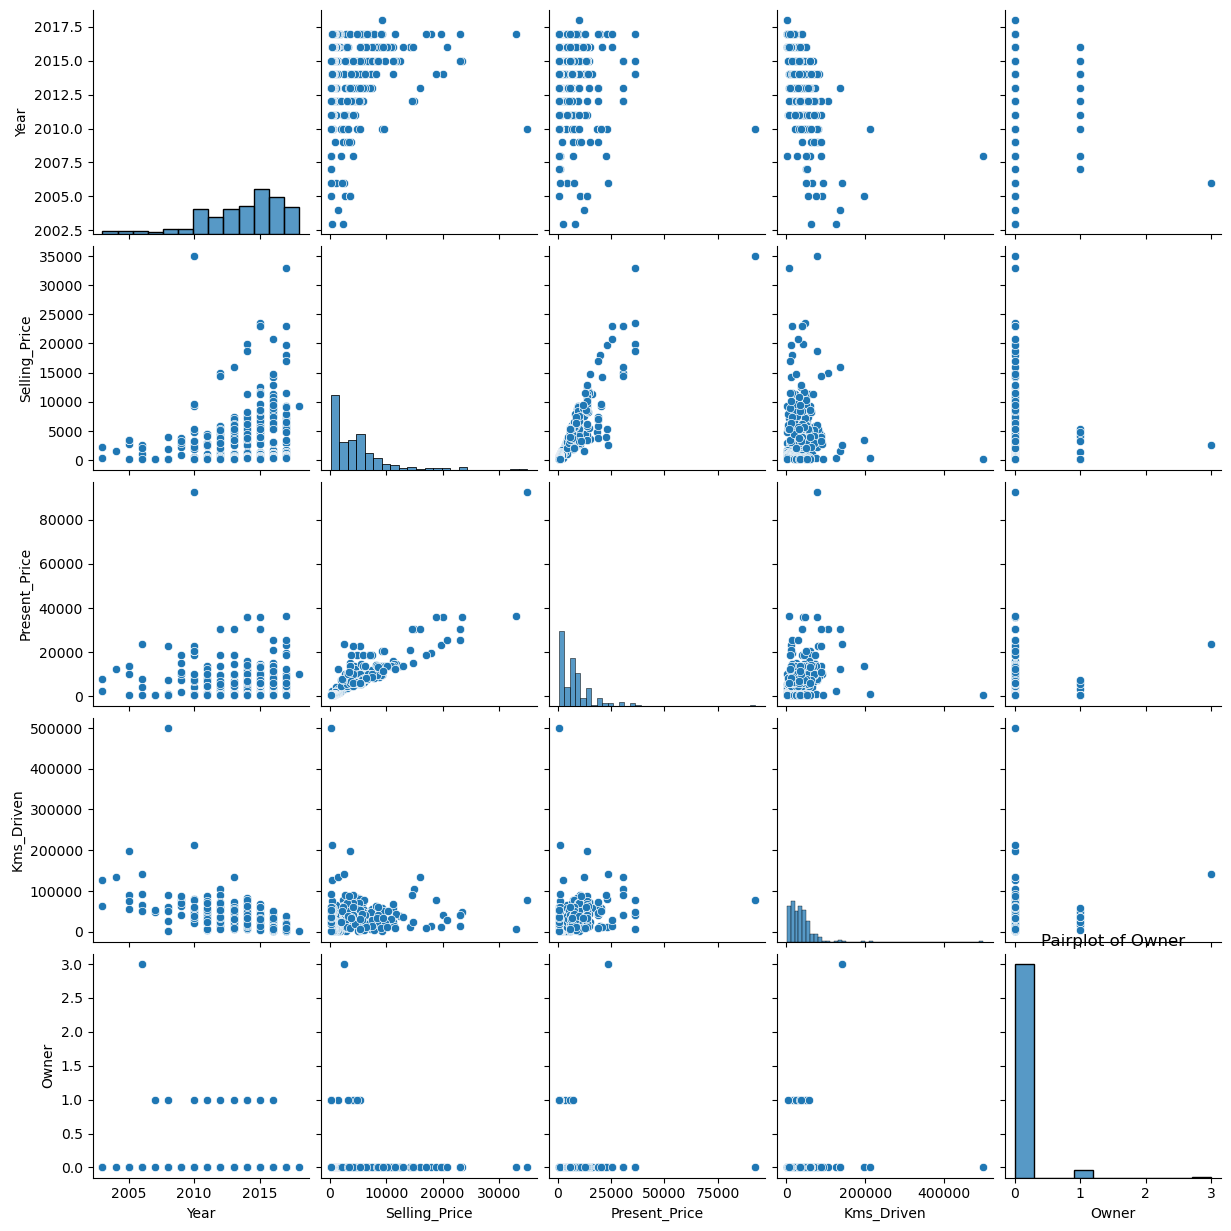

In [11]:
#Creating pairplot for numerical columns
for column in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure()
    sns.pairplot(data=df)
    plt.title(f'Pairplot of {column}')

A couple of basic operations to understand the data 

In [12]:
df['Selling_Price'].min()

100.0

In [13]:
(df['Selling_Price']).max()

35000.0

In [14]:
df['Selling_Price'].mean()

4661.295681063123

In [15]:
df['Selling_Price'].median()

3600.0

In [16]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [17]:
(df['Owner'] ==1).sum()

10

In [18]:
df['Present_Price'].min()

320.0

In [19]:
df['Present_Price'].max()

92600.0

In [20]:
df['Kms_Driven'].min()

500

In [21]:
df['Kms_Driven'].max()

500000

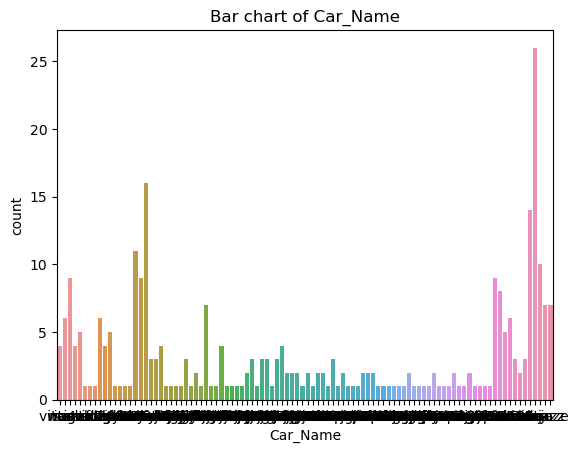

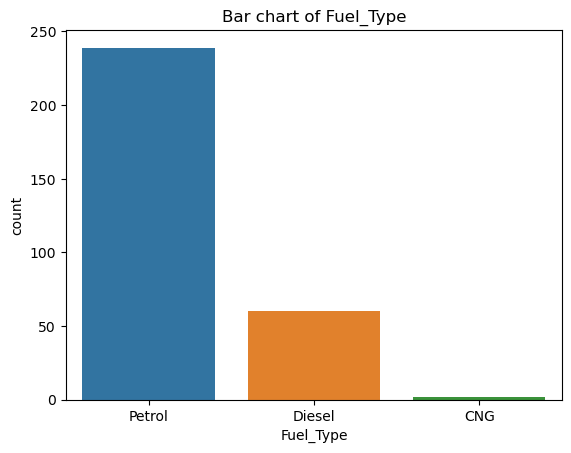

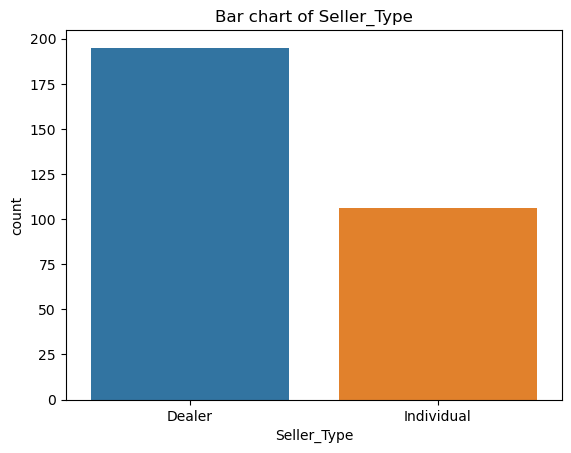

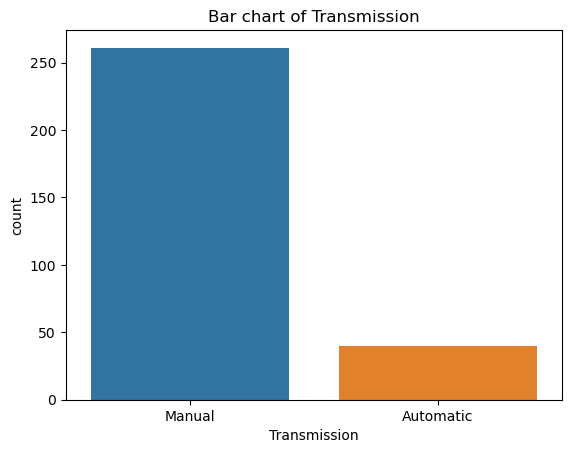

In [22]:
# Creating bar charts for the categorical columns
for column in df.select_dtypes(include=['object']).columns:
    plt.figure()
    sns.countplot(data=df, x=column)
    plt.title(f'Bar chart of {column}')

In [23]:
df['Car_Name'].nunique()

98

In [24]:
pd

<module 'pandas' from 'C:\\Users\\HP ELITEBOOK X360\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [25]:
#Identifying the quartile range
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1

#Identofying the outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

#Removing the outliers
df_no_outliers = df[~outliers].dropna()

C:\Users\HP ELITEBOOK X360\AppData\Local\Temp\ipykernel_22044\592766020.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1= df.quantile(0.25)
C:\Users\HP ELITEBOOK X360\AppData\Local\Temp\ipykernel_22044\592766020.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3= df.quantile(0.75)
C:\Users\HP ELITEBOOK X360\AppData\Local\Temp\ipykernel_22044\592766020.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * I

In [26]:
#checking to see if it worked
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       264 non-null    object 
 1   Year           264 non-null    float64
 2   Selling_Price  264 non-null    float64
 3   Present_Price  264 non-null    float64
 4   Kms_Driven     264 non-null    float64
 5   Fuel_Type      264 non-null    object 
 6   Seller_Type    264 non-null    object 
 7   Transmission   264 non-null    object 
 8   Owner          264 non-null    float64
dtypes: float64(5), object(4)
memory usage: 20.6+ KB


In [27]:
#Reseting the index numbers so that they are continious
df_no_outliers = df_no_outliers.reset_index(drop=True)

## Exploratory Data Analysis (EDA) Questions

### 1. Mileage and Depreciation
- What is the average mileage for cars in the dataset?
- What is the relationship between kms driven and selling price?

### 2. Owner History
- How does the number of previous owners correlate with the selling price?
- Are cars with more owners generally sold at lower prices?

### 3. Car  Models
- What are the most popular cars?
- What are the most expensive cars
- Do certain cars tend to have higher selling prices?

### 4. Selling Price Trends
- Are there any noticeable trends in car selling prices over the years?
- Do certain years have higher or lower average selling prices?

### 5. Seller Type 
- How does the seller type impact the selling price?
- Are cars sold by dealers typically priced higher than those sold by individuals?

### 6. Fuel Type 
- What is the distribution of fuel type by price?
- What are the pricing patterns of the different fuel types over the years?

### 7. Transmission 
- What is the distribution of cars based on transmission type?
- Does the type of transmission influence the selling price?
- What is the distribution of automatic transmission by seller type?

### 8. Comparison with Present Price
- How does the selling price compare with the present price?
- Are there instances where the selling price is significantly higher or lower than the present price?





### Milage and depreciation

In [28]:
#Average mileage 
avg_kms = df_no_outliers['Kms_Driven'].mean()
print(f'The average mileage of cars is {avg_kms:.3f} kms')

The average mileage of cars is 31969.803 kms


As you can see there is no correlation 


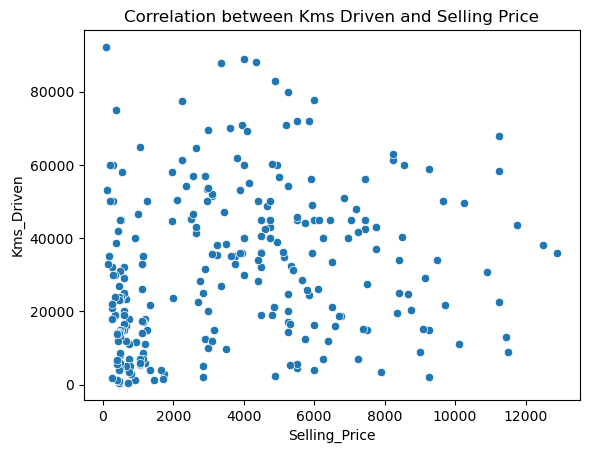

In [29]:
#Correlation between mileage and selling price
sns.scatterplot(data=df_no_outliers, x='Selling_Price', y='Kms_Driven')
plt.title('Correlation between Kms Driven and Selling Price')
print('As you can see there is no correlation ')


### Owner Hisotry


The vertical line indicates that there is no relationship between the number of owners and the selling price, It also shows that all cars have 0 drivers (there must be a data quality issue)


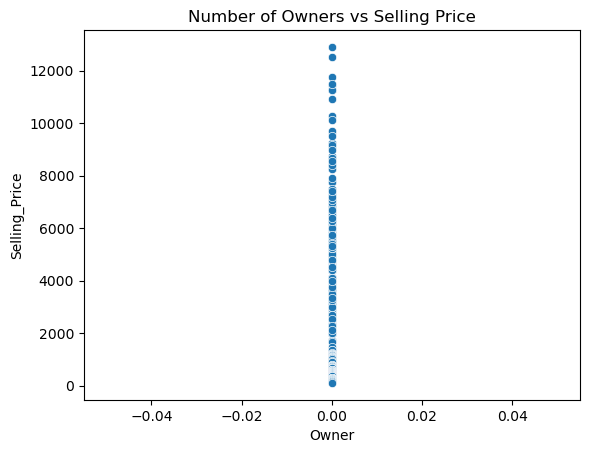

In [30]:
#Correlation between number of owners with the selling price
sns.scatterplot(data=df_no_outliers, x='Owner', y='Selling_Price')
plt.title('Number of Owners vs Selling Price')
print('The vertical line indicates that there is no relationship between the number of owners and the selling price, It also shows that all cars have 0 drivers (there must be a data quality issue)')


### Car Models


In [31]:
#5 most popular cars
popular_cars = df_no_outliers['Car_Name'].value_counts().head(5)
print(f'The 5 most popular cars are:')
print(f'{popular_cars}')


The 5 most popular cars are:
city             26
verna            14
corolla altis    13
brio             10
ciaz              9
Name: Car_Name, dtype: int64


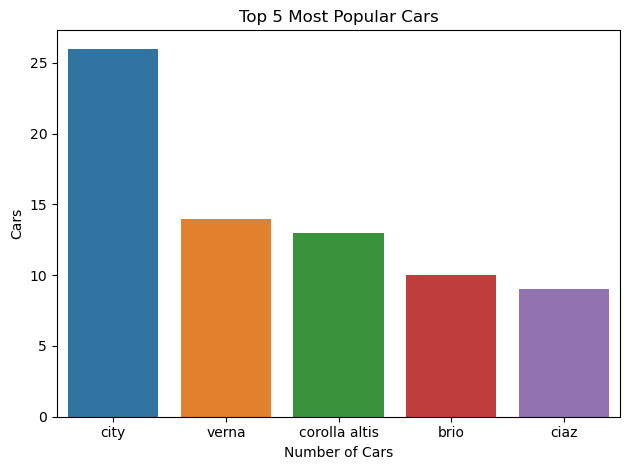

In [55]:
#Bar plot of the most popular cars
sns.barplot(x=popular_cars.index, y=popular_cars.values)
plt.title('Top 5 Most Popular Cars')
plt.xlabel('Number of Cars')
plt.ylabel('Cars')




Text(0, 0.5, 'Average Selling Price')

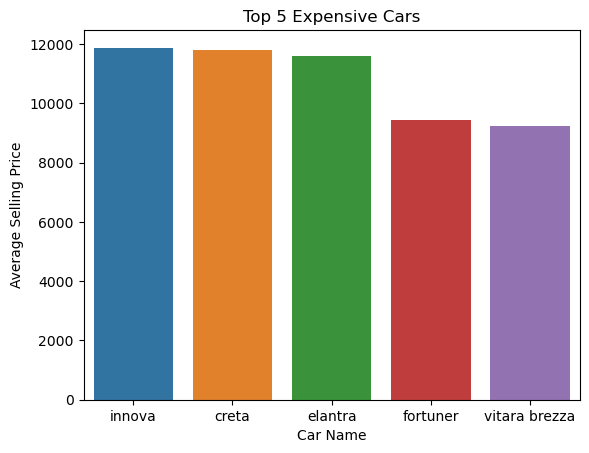

In [49]:
# Get the top 5 expensive cars
top_expensive_cars = df_no_outliers.groupby('Car_Name')['Selling_Price'].mean().nlargest(5)

# Create a bar plot
sns.barplot(x=top_expensive_cars.index, y=top_expensive_cars.values)
plt.title('Top 5 Expensive Cars')
plt.xlabel('Car Name')
plt.ylabel('Average Selling Price')


Text(0, 0.5, 'Average Selling Price')

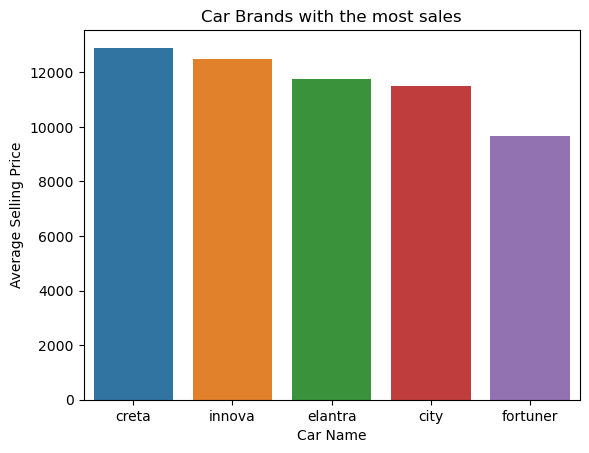

In [50]:
# The top 5 cars with the most sales
top_selling_cars = df_no_outliers.groupby('Car_Name')['Selling_Price'].max().nlargest(5)

# Create a bar plot
sns.barplot(x=top_selling_cars.index, y=top_selling_cars.values)
plt.title('Car Brands with the most sales')
plt.xlabel('Car Name')
plt.ylabel('Average Selling Price')

###  Selling Price Trends

Overall average Selling price has been increasing as the years go by, except for some years where they dropped but picked back up the following year, 2017 marks the highest growth in selling price


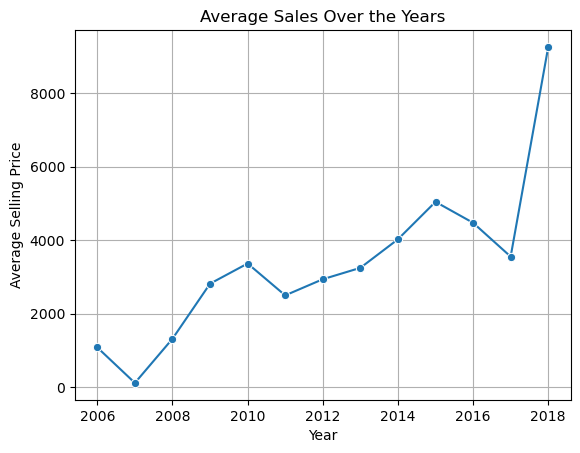

In [73]:
#Average selling price per year
avg_price_per_year = df_no_outliers.groupby('Year')['Selling_Price'].mean()
sns.lineplot(data=avg_price_per_year,marker='o')
plt.title('Average Sales Over the Years')
plt.ylabel('Average Selling Price')
plt.grid(True)

print('Overall average Selling price has been increasing as the years go by, except for some years where they dropped but picked back up the following year, 2017 marks the highest growth in selling price')


### Seller Type 


Text(0, 0.5, 'Number of Cars Sold')

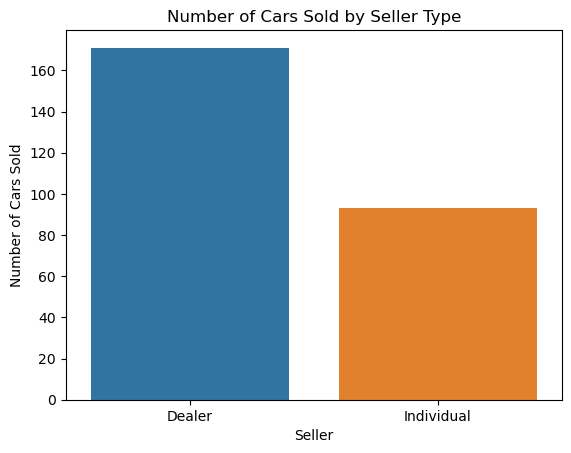

In [57]:
#Which Seller type sells most cars
sns.countplot(data=df_no_outliers, x='Seller_Type')
plt.title('Number of Cars Sold by Seller Type')
plt.xlabel('Seller')
plt.ylabel('Number of Cars Sold')


Text(0, 0.5, 'Selling Price')

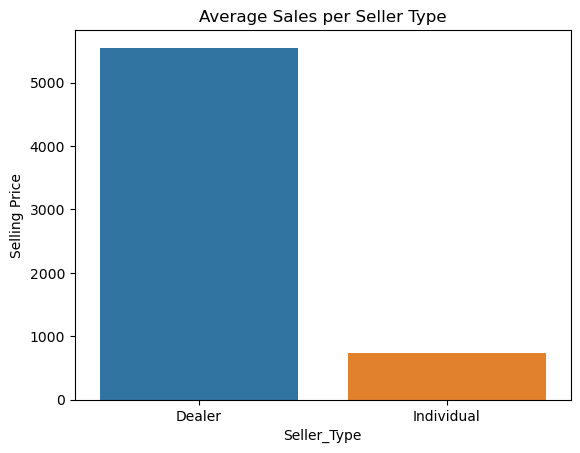

In [37]:
#Average Sales by Seller Type
avg_sales_per_seller = df_no_outliers.groupby('Seller_Type')['Selling_Price'].mean()
sns.barplot( x=avg_sales_per_seller.index,y =avg_sales_per_seller.values )
plt.title('Average Sales per Seller Type')
plt.ylabel('Selling Price')

### Fuel Type 

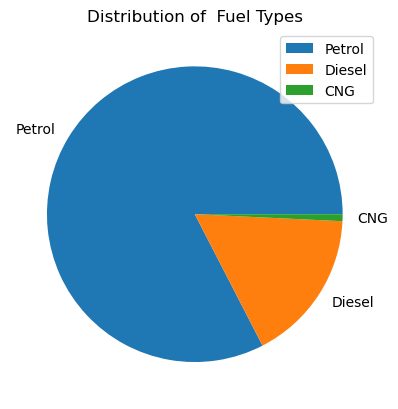

In [38]:
#Distribution of Fuel Types
df_no_outliers['Fuel_Type'].value_counts().plot(kind='pie')
plt.title('Distribution of  Fuel Types')
plt.ylabel('')
plt.legend()

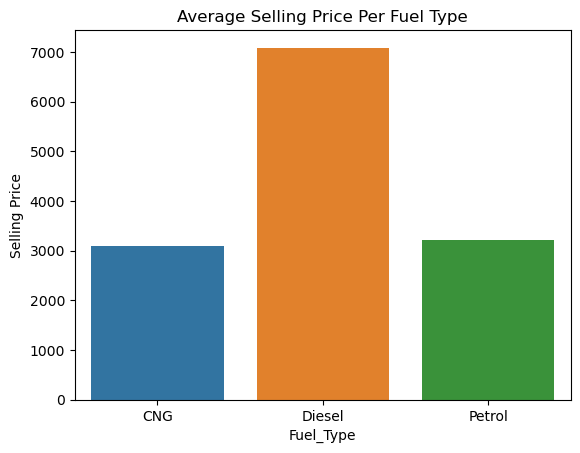

<Figure size 1400x800 with 0 Axes>

In [39]:
#Average Selling Price per Fuel type

avg_price_per_fuel_type = df_no_outliers.groupby('Fuel_Type')['Selling_Price'].mean()
sns.barplot( x=avg_price_per_fuel_type.index, y=avg_price_per_fuel_type.values)
plt.title('Average Selling Price Per Fuel Type')
plt.ylabel('Selling Price')
plt.figure(figsize=(14,8))



Text(0.5, 1.0, 'Average Selling Price Trend Per Fuel Types')

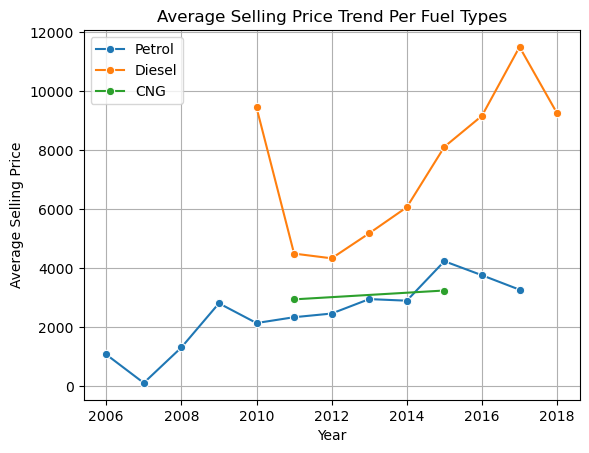

In [40]:
#Average selling price of fuel type per year
avg_price_per_fuel_type_per_year = df_no_outliers.groupby(['Fuel_Type','Year'])['Selling_Price'].mean().reset_index()
#Line for Petrol
sns.lineplot(data=avg_price_per_fuel_type_per_year[avg_price_per_fuel_type_per_year['Fuel_Type']=='Petrol'], x='Year', y='Selling_Price',marker='o', label='Petrol')
#Line for Diesel
sns.lineplot(data=avg_price_per_fuel_type_per_year[avg_price_per_fuel_type_per_year['Fuel_Type']=='Diesel'], x='Year', y='Selling_Price',marker='o',label='Diesel')
#Line for CNG
sns.lineplot(data=avg_price_per_fuel_type_per_year[avg_price_per_fuel_type_per_year['Fuel_Type']=='CNG'],x='Year',y='Selling_Price', marker='o', label='CNG')
plt.grid(True)
plt.ylabel('Average Selling Price')
plt.xlabel('Year')
plt.title('Average Selling Price Trend Per Fuel Types')


### Transmission

Text(0.5, 1.0, 'Distribution of Transmission')

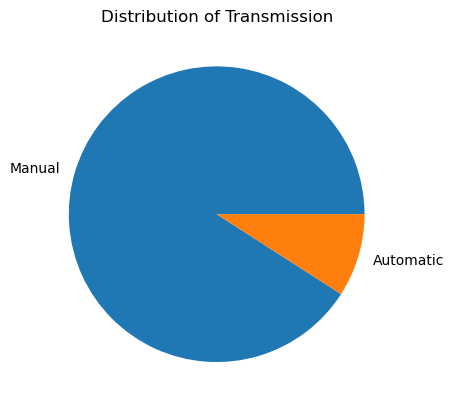

In [42]:
# Distribution of Transmission Types
df_no_outliers['Transmission'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.title('Distribution of Transmission')

Most cars sold are manual but the most expensive cars have automatic transmission


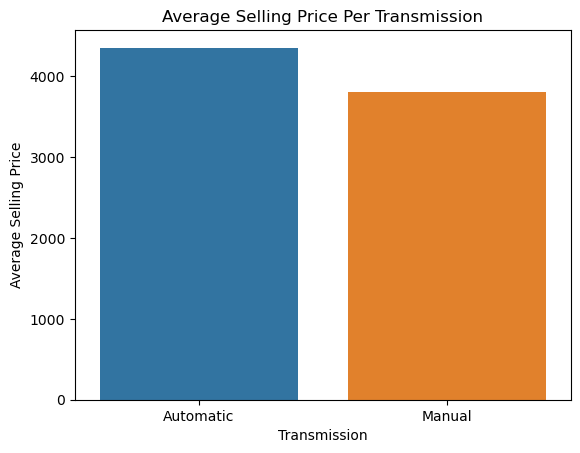

In [43]:
#Average Selling Price per Transmission
avg_price_per_transmission = df_no_outliers.groupby('Transmission')['Selling_Price'].mean()
sns.barplot(x=avg_price_per_transmission.index, y=avg_price_per_transmission.values)
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price Per Transmission')
print('Most cars sold are manual but the most expensive cars have automatic transmission')

Text(0.5, 1.0, 'Distribution of Number of Sales of Cars With Automatic Transmission')

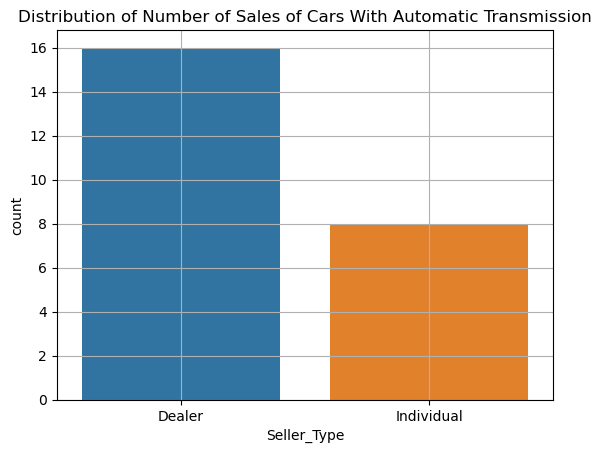

In [60]:
#distribution of automatic cars by seller type
automatic = df_no_outliers[df_no_outliers['Transmission']=='Automatic']
sns.countplot(data=automatic, x='Seller_Type')
plt.grid(True)
plt.title('Distribution of Number of Sales of Cars With Automatic Transmission')

### Comparison With Present Price

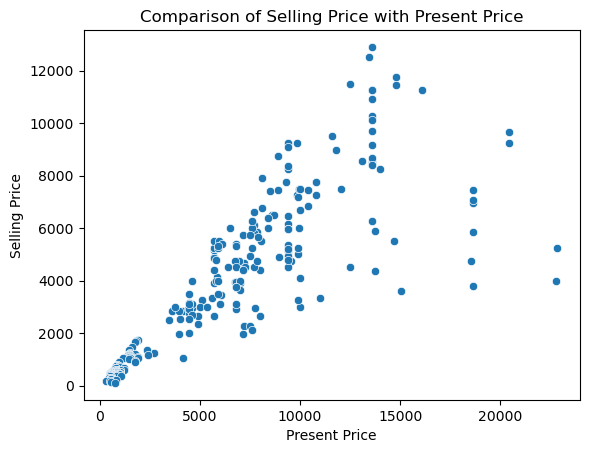

In [44]:

# Comparison of selling price with present price
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df_no_outliers)
plt.title("Comparison of Selling Price with Present Price")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()

As present price increases selling prices increases too

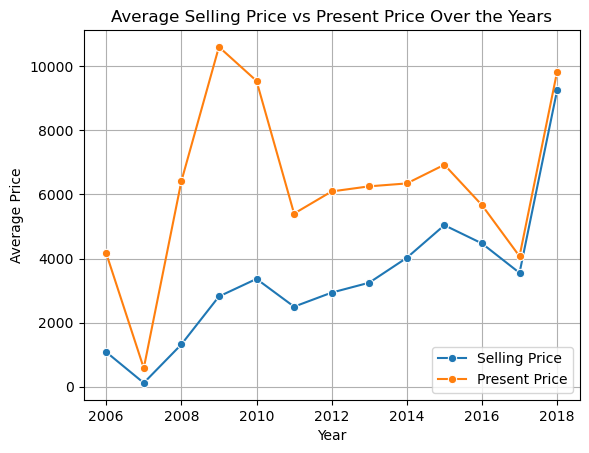

In [72]:
#Line graph of Present and Selling Price
avg_sell_price = df_no_outliers.groupby('Year')['Selling_Price'].mean()
avg_present_price = df_no_outliers.groupby('Year')['Present_Price'].mean()

#Line for Selling Price
sns.lineplot(data=avg_sell_price, x='Year', y=avg_sell_price.values,marker='o',label='Selling Price')
#Line for Present Price
sns.lineplot(data=avg_present_price,x='Year', y= avg_present_price.values, marker='o', label='Present Price')

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Selling Price vs Present Price Over the Years')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion and Insights



First off, we checked out the mileage (how far the cars have been driven), and it turns out the average is around 31,969.803 kilometers. But here's the thing – there's no clear connection between how much a car has been driven and how much it sells for. So, it seems like mileage isn't the main player in deciding the price tag.

Then we checked out how the number of owners might affect the selling price. Oddly enough, it looks like all the cars in our data set claim to have zero owners. Something fishy might be going on here, maybe a data hiccup.

Now, let's talk popular rides! The top 5 cars that show up the most are City, Verna, Corolla Altis, Brio, and Ciaz. When it comes to the big spenders, the average prices for the top 5 are Innova, Creta, Elantra, Fortuner, and Vitara Brezza. And in terms of actual sales, Creta, Innova, Elantra, City, and Fortuner take the lead.

Looking at the overall trend, the average selling prices have been on the rise, with a few bumps in the road in 2007, 2011, and 2017. Speaking of sellers, dealers are the go-to folks, selling more cars and making bigger sales on average compared to individual sellers.

Switching gears to fuel types, Petrol cars rule the roost, Diesel comes next, and CNG is the least popular. Diesel cars tend to be pricier, while Petrol cars are a bit more budget-friendly.

When it comes to transmissions (the way the car shifts gears), most cars are manual. But here's a tidbit – automatic cars tend to be pricier, especially when sold by dealers.

Lastly, comparing the selling price with what the car cost when it was new (present price), there's a general trend that as the present price goes up, so does the selling price. Some standout moments include a big spike in present prices from 2007 to 2009 and a close match between selling and present prices from 2017 to 2018.

To sum it up, this deep dive into the data gave us a good peek into how things roll in the used car world. Dealers play a big role, and what kind of fuel your car sips and how it shifts gears can make a difference in the price tag. There's still some detective work to do on the zero owner situation, and there's always room for more in-depth analysis. Your thoughts and feedback are always welcome! Here's to more data adventures ahead!

In [75]:
df_no_outliers.to_csv('cleaned_car_data.csv', index=False)
